In [56]:
# Import tools
from qiskit import QuantumCircuit, assemble, Aer, execute
from qiskit.visualization import plot_histogram, plot_bloch_vector
from math import sqrt, pi

# Create a quantum circuit with one qubit
qc = QuantumCircuit(1)

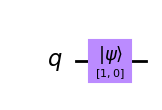

In [3]:
# Define initial_state as |0> ; apply initialisation to the 0th qubit ; draw circuit
initial_state = [1, 0]
qc.initialize(initial_state, 0)
qc.draw('mpl')

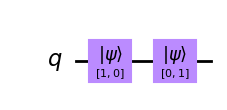

In [4]:
# Define initial_state as |1> ; apply initialisation to the 0th qubit ; draw circuit
initial_state = [0, 1]
qc.initialize(initial_state, 0)
qc.draw('mpl')

In [21]:
import numpy as np
import cmath
import matplotlib as plt

In [23]:
x = np.array([[0, 1],
                    [1, 0]])
y = np.array([[0, -1j],
                    [1j, 0]])
z = np.array([[1, 0],
                    [0, -1]])
h = (1 / cmath.sqrt(2)) * np.array([[1, 1],
                                           [1, -1]])
s = np.array([[1, 0],
                  [0, 1j]])

In [27]:
zero = np.array([1,0])
one = np.array([0,1])
print(zero)
print(one)

[1 0]
[0 1]


In [16]:
print(x.dot(zero))
print(x.dot(one))

[0 1]
[1 0]


In [17]:
print(y.dot(zero))
print(y.dot(one))

[0.+0.j 0.+1.j]
[0.-1.j 0.+0.j]


In [18]:
print(z.dot(zero))
print(z.dot(one))

[1 0]
[ 0 -1]


In [19]:
print(h.dot(zero))
print(h.dot(one))

[0.70710678+0.j 0.70710678+0.j]
[ 0.70710678+0.j -0.70710678+0.j]


In [20]:
print(s.dot(zero))
print(s.dot(one))

[1.+0.j 0.+0.j]
[0.+0.j 0.+1.j]


In [62]:
###################################################################################################
##### Example 2 ###################################################################################
###################################################################################################
from qiskit import QuantumCircuit, Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector
from math import sqrt, pi, log2
import os

In [63]:
# Define a function to map from statevector to dictionary
def statevector_to_dict(sv):
    bit_mask = f"0{int(log2(len(sv)))}b"
    return {format(i, bit_mask): v.real for i, v in enumerate(sv)} 

In [64]:
# Define quantum circuit and some initial statevectors
Q_circuit = QuantumCircuit(1)  # Create a quantum circuit with one qubit
initial_state0 = [0, 1]   # Define initial_state as |1>
initial_state1 = [1, 0]   # Define initial_state as |0>
initial_state2 = [1/sqrt(2), 1/sqrt(2)]

/home/bcb/qic/.venv/lib/python3.9/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


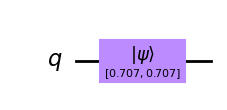

In [65]:
# Apply initialisation operation to the 0th qubit
Q_circuit.initialize(initial_state2, 0)
Q_circuit.draw('mpl')

In [66]:
# Run the quantum circuit on a statevector simulator backend
simulator = Aer.get_backend('statevector_simulator')

In [67]:
# Create a Quantum program for execution
job = simulator.run(Q_circuit, shots=1000)
result = job.result()
outputstate = result.get_statevector(Q_circuit, decimals=3)
print(outputstate)

Statevector([0.707+0.j, 0.707+0.j],
            dims=(2,))


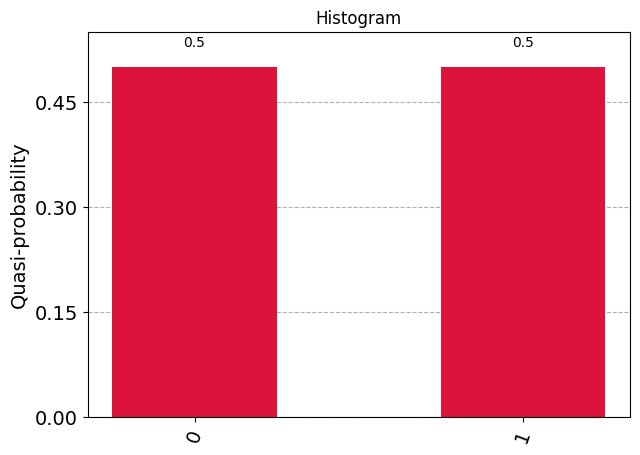

In [68]:
# Map statevector to dictionary
sv_dict = statevector_to_dict(outputstate.data)
plot_histogram(sv_dict, legend=None, color=['crimson'], title="Histogram")

In [81]:
# Create a quantum circuit with 1 qubit
qc = QuantumCircuit(1)

# Apply the Y gate
qc.s(0)

# To visualize the circuit
print(qc.draw())

   ┌───┐
q: ┤ S ├
   └───┘


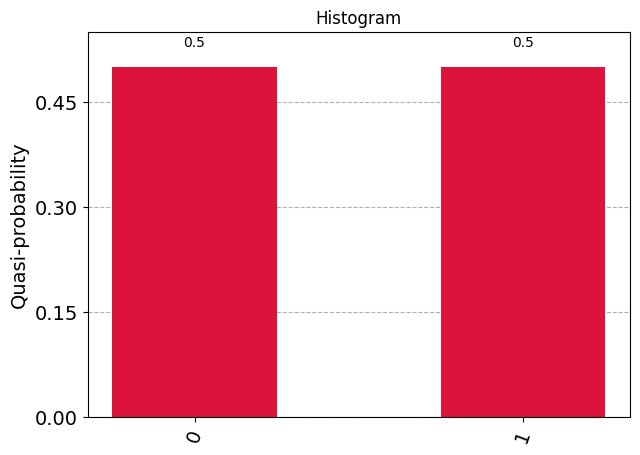

In [82]:
# Add a measurement to the circuit because we want to simulate a result
qc.measure_all()

# Execute the circuit on the qasm simulator
job = simulator.run(Q_circuit, shots=1)
    
# Grab results from the job
result = job.result()
outputstate = result.get_statevector(Q_circuit, decimals=3)
sv_dict = statevector_to_dict(outputstate.data)
plot_histogram(sv_dict, legend=None, color=['crimson'], title="Histogram")    